In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
raw_csv_data = pd.read_csv("../Data/index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


### Length of the time Period

In [ ]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [ ]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [ ]:
df_comp.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

### Setting the index
! Important

In [ ]:
df_comp.set_index("date", inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### setting desired frequency
cela nous permet de mieux naviguer dans nos données

In [ ]:
df_comp = df_comp.asfreq('b') # previously i've put 'd', but market indexes in only available in business days
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling missing values

In [ ]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

rappelons qu'il n'y avait pas de valeurs manquantes dans les données de bases, mais en y ajoutant des fréquences nous nous rendons comptes que si...

Il y existe plusieurs manière de gérer ces valeurs manquantes, l'une d'elle est fillna():
- front filling : assigns the value of the previous period
- back filling : assigns the value of the next period
- assigning the same value: like average (bad approach for time series because the data follows a mean curve )

In [ ]:
df_comp.spx = df_comp.spx.fillna(method="ffill")

C:\Users\herma\AppData\Local\Temp\ipykernel_4980\247795352.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.spx = df_comp.spx.fillna(method="ffill")


In [ ]:
df_comp.ftse = df_comp.ftse.bfill()
df_comp.dax = df_comp.dax.bfill()

In [ ]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

### Simplifying the dataset

In [ ]:
df_comp['market_value'] = df_comp['spx']
del df_comp["ftse"], df_comp["dax"], df_comp["nikkei"], df_comp['spx']
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### Splitting the data
80% train set 20% test set

In [ ]:
size = int(len(df_comp)*0.8)

df_train = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

### white noice

In [ ]:
wn = np.random.normal(loc=df_train.market_value.mean(), scale=df_train.market_value.std(), size=len(df_train))

In [ ]:
df_train['wn'] = wn

C:\Users\herma\AppData\Local\Temp\ipykernel_4980\2767877954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['wn'] = wn


In [ ]:
df_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1089.402452
std,292.559287,294.145393
min,438.920000,102.771417
25%,914.620000,890.595634
50%,1144.650000,1090.771741
75%,1316.280729,1281.984078
max,1570.252238,2163.708034


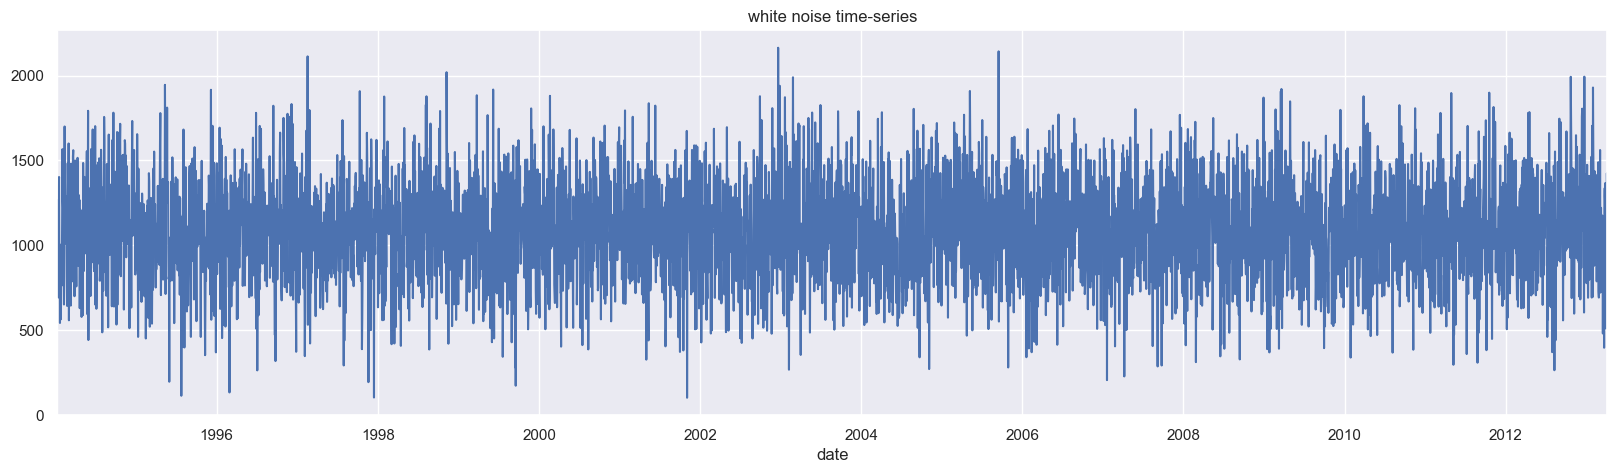

In [ ]:
df_train.wn.plot(figsize=(20, 5), title="white noise time-series")
# plt.title("white noise time-series", size=24)
plt.show()

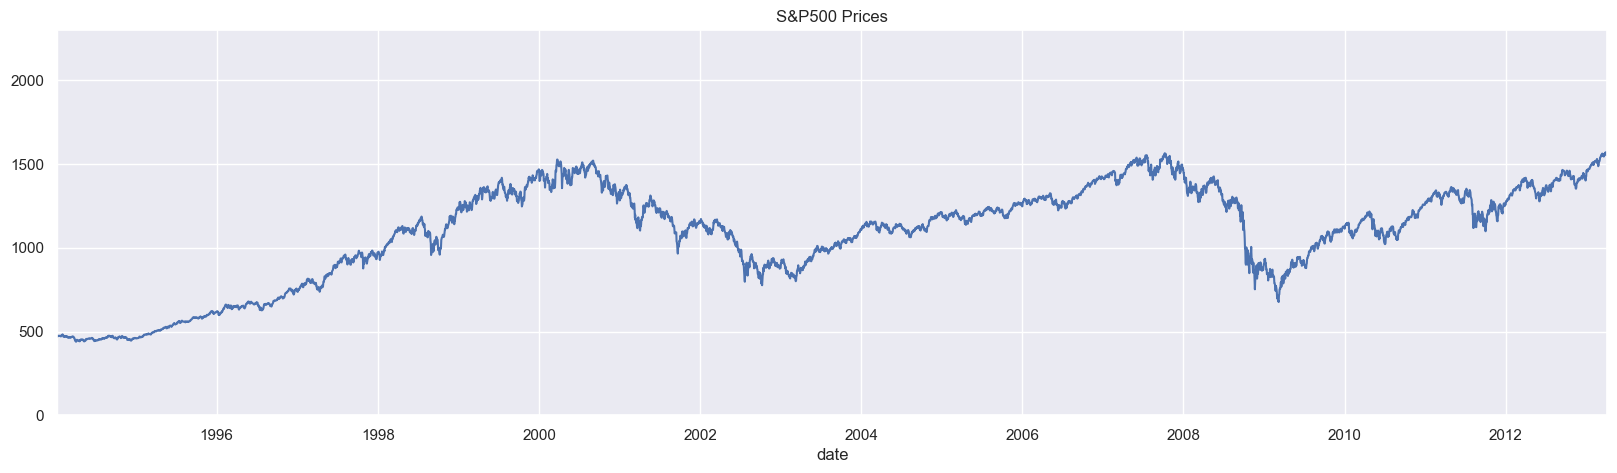

In [ ]:
df_train.market_value.plot(figsize=(20,5), title="S&P500 Prices")
plt.ylim(0, 2300)
plt.show()

### Random walk